In [1]:
from importlib import reload
import config
reload(config)
import os

import torch
from torch import nn
from torch.utils.data import DataLoader

# %load_ext tensorboard

import dataset, model, trainer
import numpy as np
import util

{3: 0.4702177702376712, 4: 0.12387134453058468, 5: 2, 6: -0.1560145697085249, 7: -0.009089351128707457, 8: 0.030386411274769598, 9: 0.08878273044067464, 10: 0.26665196207057984, 11: -0.3261693216052348, 12: 0.288119847135887, 13: 0.09458912745050818, 14: -0.27338802143075436, 15: -0.3811239236447522, 16: 0.44880199442834023, 17: 0.05256703838212218, 18: -0.3561262249009991, 19: -0.1456900204409669, 20: -0.4067719188396116}


D:\Github\smlm-dl\smlm_dl\dataset.py:222: RuntimeWarning: invalid value encountered in log
  im = axes[1].imshow(np.log(tiled_images))


125:	 [id = 125.000,], [x = -0.115,], [y = 1.481,], [z = 0.405,], [A = 1178.545,], [bg = 39.302,],
91:	 [id = 91.000,], [x = -7.818,], [y = 5.829,], [z = 5.189,], [A = 741.662,], [bg = 50.024,],
93:	 [id = 93.000,], [x = -2.774,], [y = -8.654,], [z = 5.140,], [A = 873.979,], [bg = 88.144,],
51:	 [id = 51.000,], [x = -10.233,], [y = -9.604,], [z = -2.203,], [A = 1028.682,], [bg = 74.927,],
24:	 [id = 24.000,], [x = 3.940,], [y = -3.393,], [z = -6.505,], [A = 1590.655,], [bg = 28.382,],
73:	 [id = 73.000,], [x = 5.451,], [y = -4.351,], [z = 8.188,], [A = 1860.569,], [bg = 73.548,],
39:	 [id = 39.000,], [x = 4.793,], [y = -4.635,], [z = 2.028,], [A = 1860.032,], [bg = 81.192,],
37:	 [id = 37.000,], [x = -4.233,], [y = 8.735,], [z = -1.384,], [A = 1754.765,], [bg = 92.537,],
30:	 [id = 30.000,], [x = 2.423,], [y = 1.228,], [z = -0.254,], [A = 1155.487,], [bg = 67.408,],
64:	 [id = 64.000,], [x = -7.915,], [y = 1.863,], [z = 1.686,], [A = 1243.175,], [bg = 11.523,],
87:	 [id = 87.000,], [x 

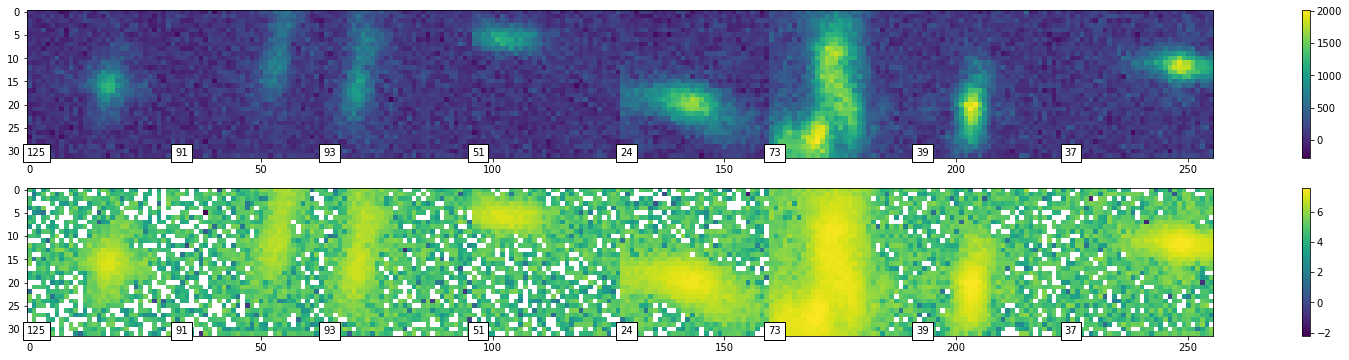

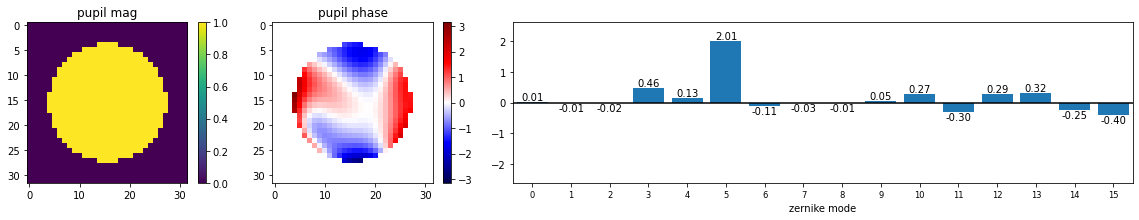

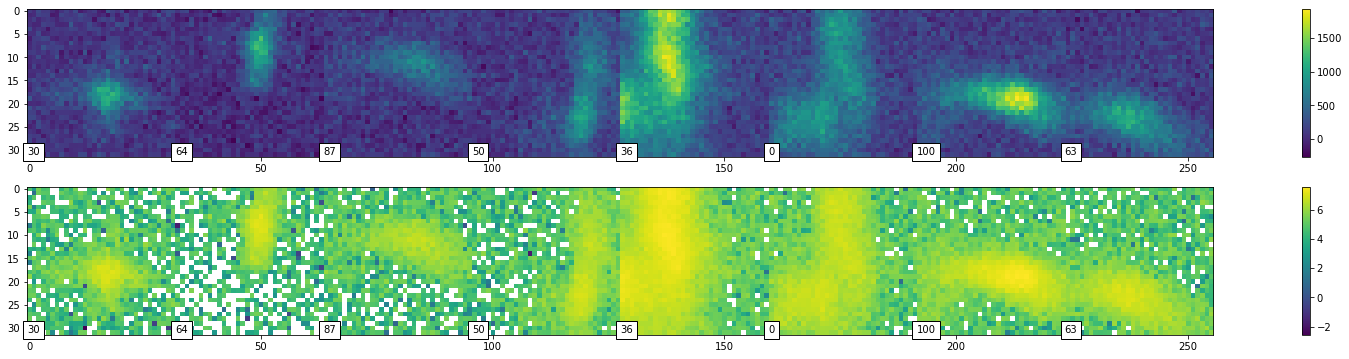

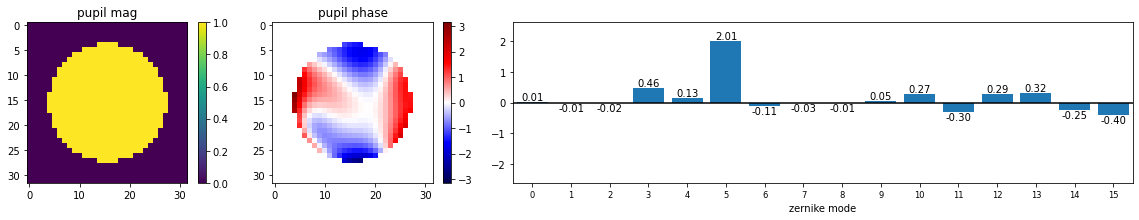

In [2]:
reload(dataset)

psf_zerns = dict()
for z in range(3, 21):
    psf_zerns[z] = np.random.uniform(-0.5, 0.5)
psf_zerns.update({5:2 })

print(psf_zerns)

settings = {
    # 'out_size': (64,64),
    'length': (128, 1),
    'dropout_p': 0,
    'psf_zerns': psf_zerns,
    # 'noise_params': {},
    'normalize': False,
    'padding': (4,4),
    'random_z': True,
    "augmentations":{},
    # "augmentations":{"pixel shift":(4,4), }#"add noise":0.1},
}

# training_data = dataset.FourierOptics2DPSFDataset(**settings)
# training_data = dataset.Gaussian2DPSFDataset(**settings)
training_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(training_data)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)


# valid_data = dataset.FourierOptics2DPSFDataset(**settings)
# valid_data = dataset.Gaussian2DPSFDataset(**settings)
valid_data = dataset.FourierOpticsPSFDataset(**settings)
dataset.inspect_images(valid_data)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_20-55-19_DESKTOP-7NNT713\model.ptm


C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-19_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.scale.weight'])
optimizer_state_dict: dict_keys(['state', 'param_groups'])
loss_function_state_dict: odict_keys([])
log_path: D:\Pytorch\runs\2021-12-10_20-55-19_DESKTOP-7NNT713
epoch: 1
loss: 159546.90625


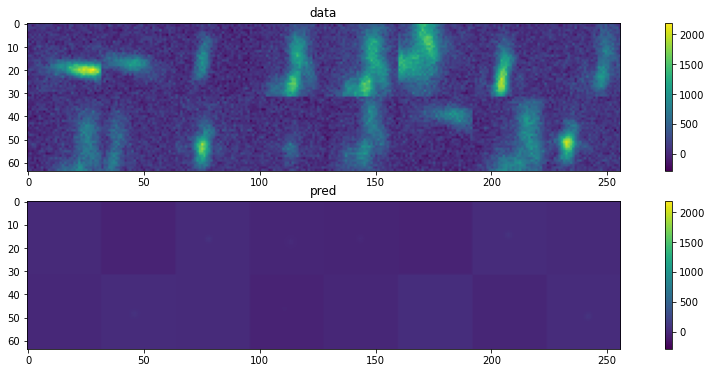

In [3]:
reload(trainer)
fitting_model = model.Gaussian2DModel(encoder_class=model.IdEncoderModel,
                                      # img_size=(32,32),
                                      fit_params=['x','y','A','sig','bg'],
                                      max_psf_count=1,
                                      encoder_params={"num_img":len(train_dataloader.dataset)
                                          # "depth":3,
                                                      # "skip_channels":4,
                                                      # "first_layer_out_channels":16,
                                                     }
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
# model.check_model(fitting_model, )

# filepath = training.current_state["log_path"]
# print(filepath)
# training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
# training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
# training.train_data_loader = train_dataloader
# training.valid_data_loader = valid_dataloader
# training.train_and_validate(2, label="test")
# model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_20-55-20_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-20_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.weight', 'encoder.encoders.conv_layer2.3.bias', 'encoder.enc

D:\Github\smlm-dl\smlm_dl\model.py:716: RuntimeWarning: invalid value encountered in log10
  im = axes[0, i].imshow(np.log10(img[0]))


D:\Pytorch\runs\2021-12-10_20-55-20_DESKTOP-7NNT713
No training data supplied. Remember to set prior to training.
No validation data supplied. Remember to set prior to training.
CUDA not available. Defaulting to CPU
Device: cpu
Loaded from D:\Pytorch\runs\2021-12-10_20-55-20_DESKTOP-7NNT713\model.ptm, last modified: Fri Dec 10 20:55:20 2021
Layer (type:depth-idx)                   Param #
Gaussian2DModel                          --
├─Gaussian2DRenderer: 1-1                --
├─ConvImageEncoderModel: 1-2             --
│    └─ModuleDict: 2-1                   --
│    │    └─Sequential: 3-1              2,514
│    │    └─Sequential: 3-2              13,984
│    │    └─Sequential: 3-3              55,616
│    └─ModuleDict: 2-2                   --
│    └─ModuleDict: 2-3                   --
│    │    └─Sequential: 3-4              221,824
│    │    └─Sequential: 3-5              131,392
│    └─ModuleDict: 2-4                   --
│    │    └─Conv2d: 3-6                  325
Total params: 

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-23_DESKTOP-7NNT713_test\checkpoint.ptc
model_state_dict: odict_keys(['encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.weight', 'encoder.encoders.conv_layer2.3.bias', 'encode

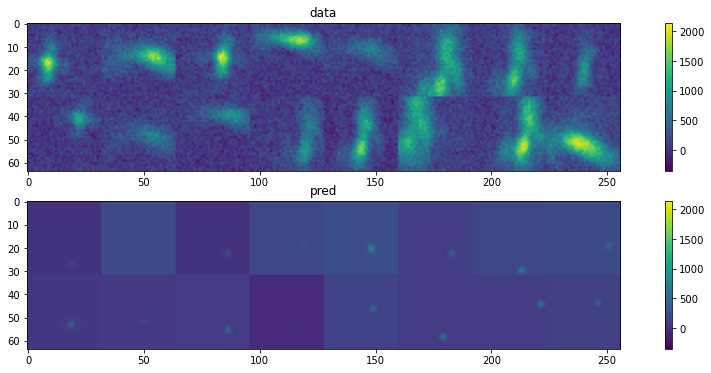

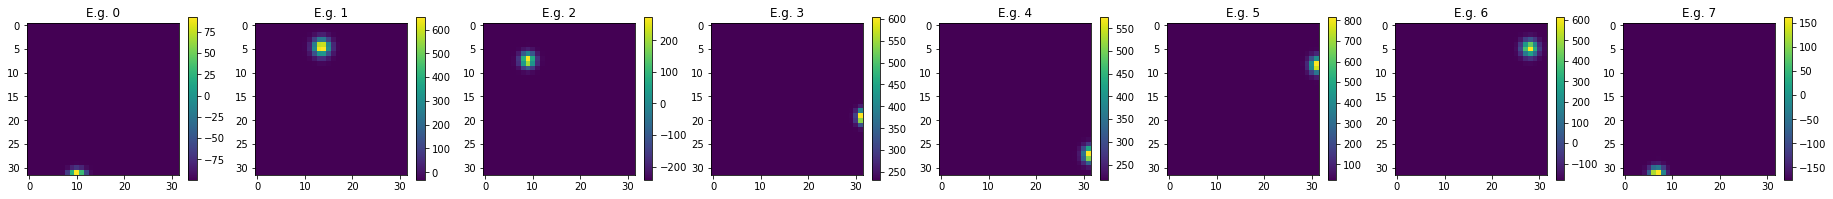

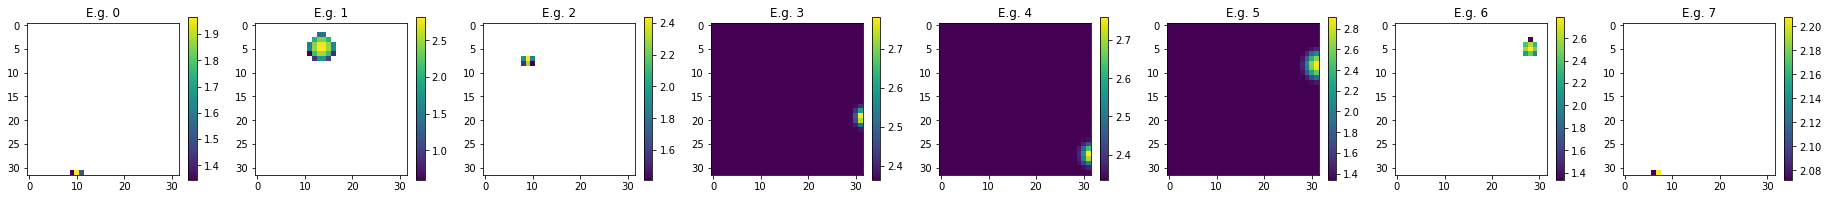

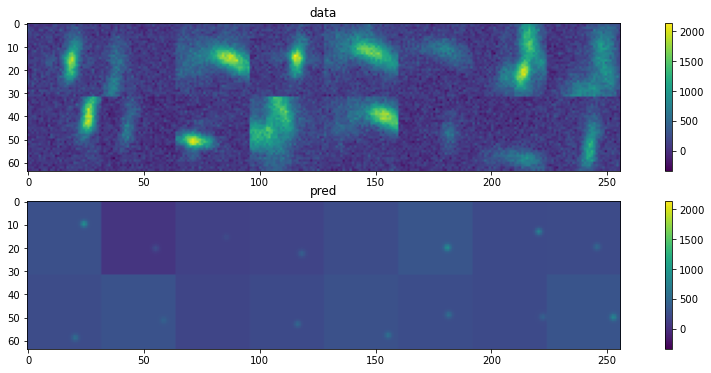

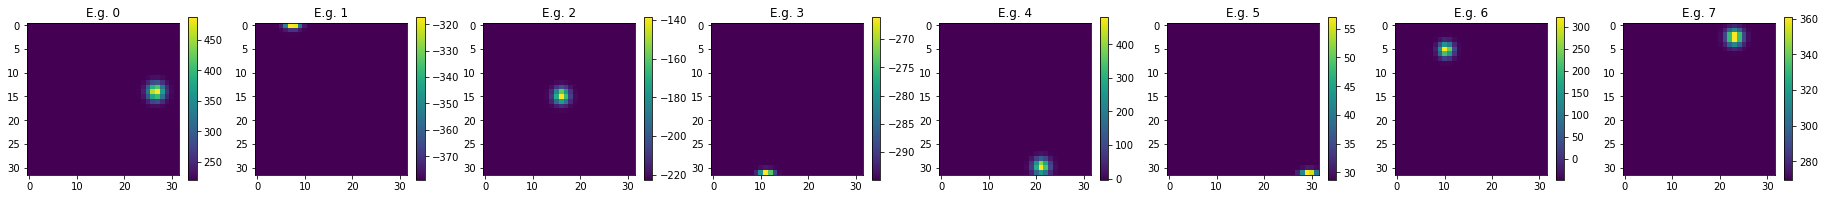

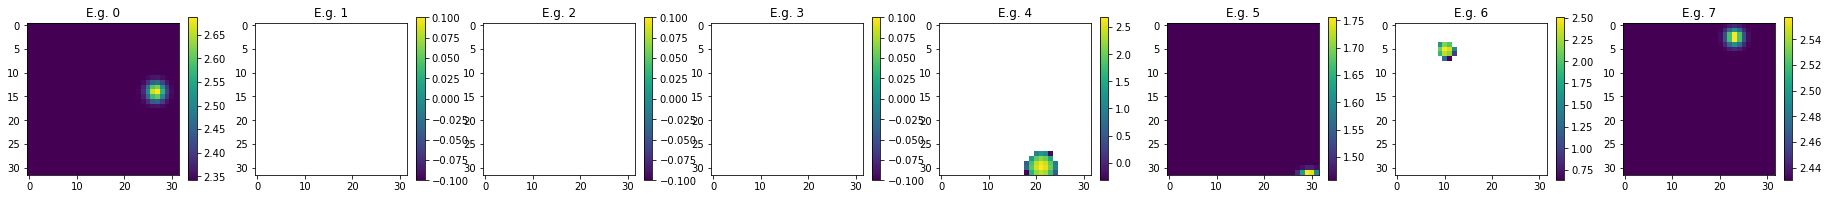

In [4]:
reload(trainer)
fitting_model = model.Gaussian2DModel(fit_params=['x','y','sig', 'A', 'bg'])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2,)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, label="test")
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_20-55-31_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

C:\Users\Kenny\anaconda3\envs\smlm-dl\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(


Saved to : D:\Pytorch\runs\2021-12-10_20-55-31_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.we

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-34_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.scale_factor', 'renderer.template.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.we

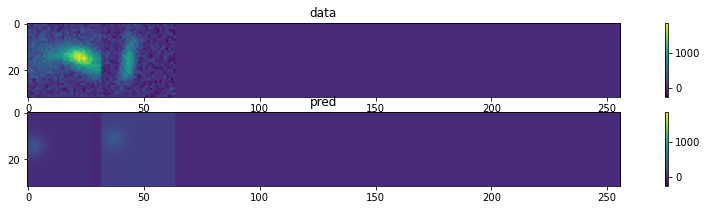

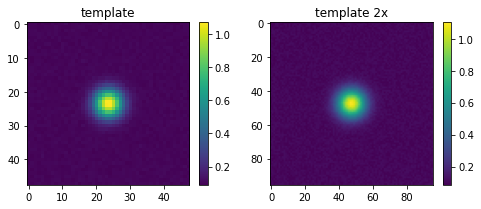

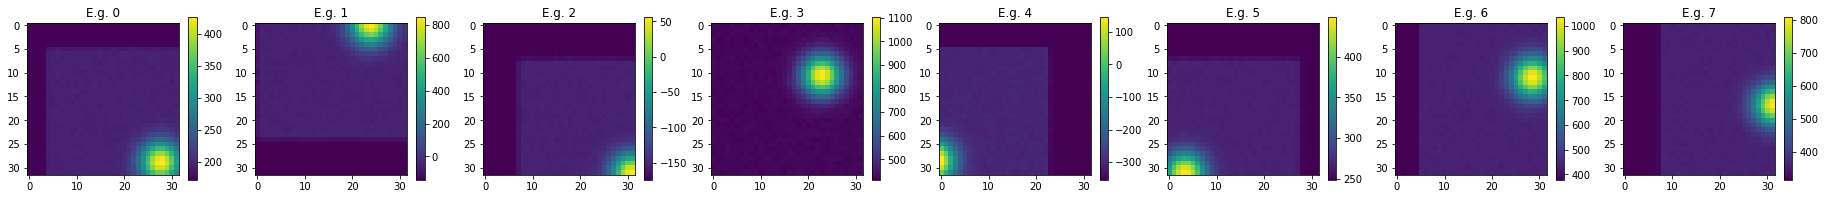

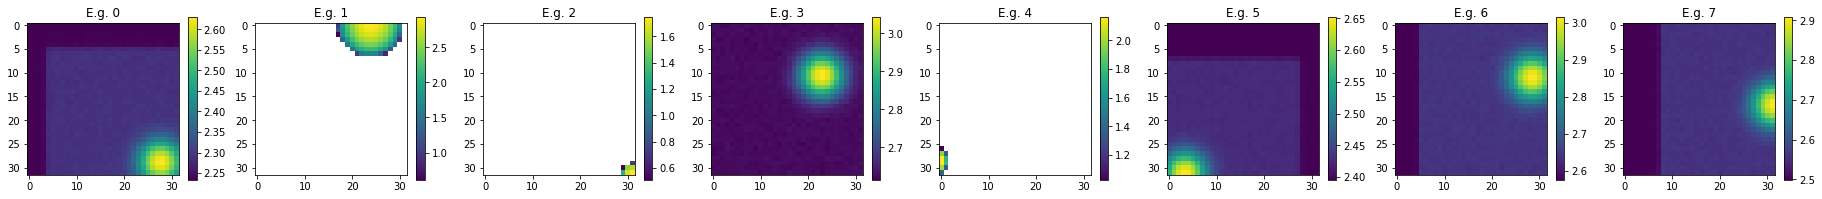

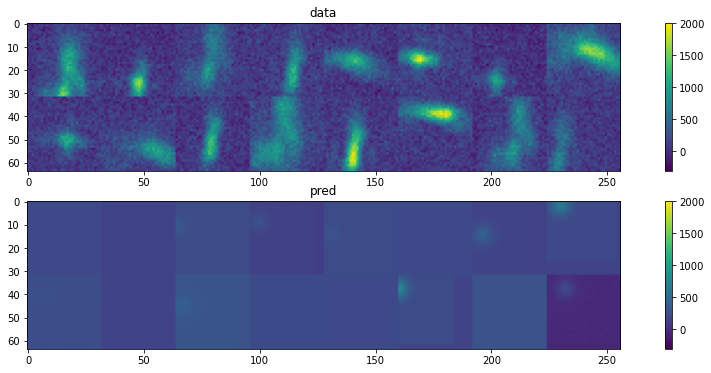

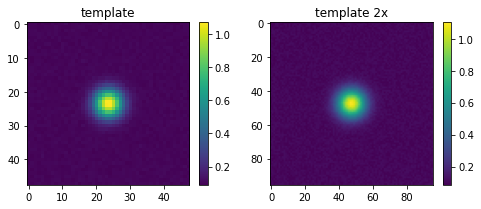

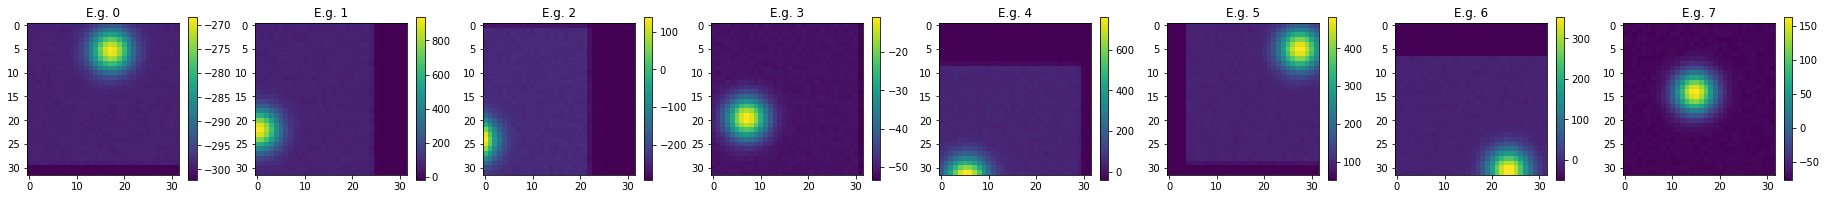

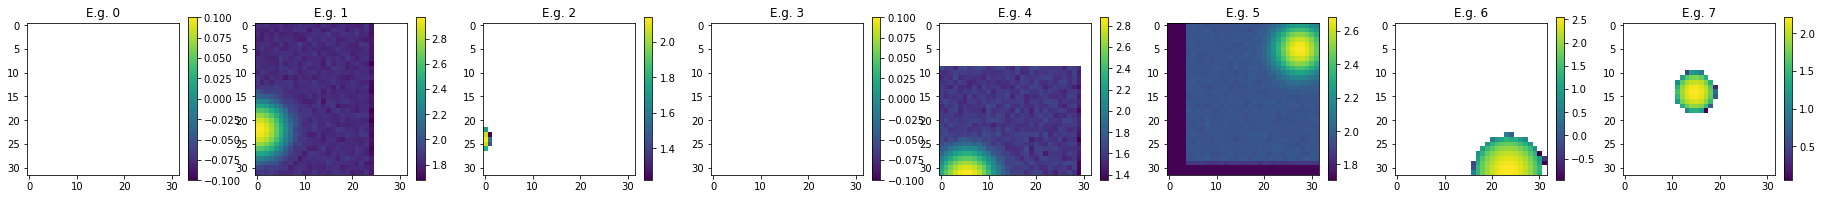

In [5]:
reload(trainer)
fitting_model = model.Template2DModel(fit_params=['x','y','A','bg'],                                      
                                      renderer_params={"template_padding":(8,8)},
                                     )
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_log_limit_images=2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, validate_interval=1, tb_logger=None)
model.check_model(fitting_model, )

CUDA not available. Defaulting to CPU
Device: cpu
Saved to : D:\Pytorch\runs\2021-12-10_20-55-44_DESKTOP-7NNT713\model.ptm


  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-44_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.weight', 'encoder.encode

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Saved to : D:\Pytorch\runs\2021-12-10_20-55-47_DESKTOP-7NNT713\checkpoint.ptc
model_state_dict: odict_keys(['renderer.pupil_phase.0.parameter', 'encoder.encoders.conv_layer0.0.weight', 'encoder.encoders.conv_layer0.0.bias', 'encoder.encoders.conv_layer0.1.weight', 'encoder.encoders.conv_layer0.1.bias', 'encoder.encoders.conv_layer0.3.weight', 'encoder.encoders.conv_layer0.3.bias', 'encoder.encoders.conv_layer0.4.weight', 'encoder.encoders.conv_layer0.4.bias', 'encoder.encoders.conv_layer1.0.weight', 'encoder.encoders.conv_layer1.0.bias', 'encoder.encoders.conv_layer1.1.weight', 'encoder.encoders.conv_layer1.1.bias', 'encoder.encoders.conv_layer1.3.weight', 'encoder.encoders.conv_layer1.3.bias', 'encoder.encoders.conv_layer1.4.weight', 'encoder.encoders.conv_layer1.4.bias', 'encoder.encoders.conv_layer2.0.weight', 'encoder.encoders.conv_layer2.0.bias', 'encoder.encoders.conv_layer2.1.weight', 'encoder.encoders.conv_layer2.1.bias', 'encoder.encoders.conv_layer2.3.weight', 'encoder.encode

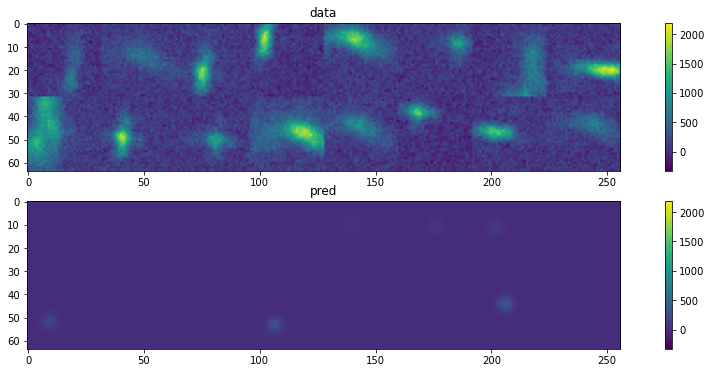

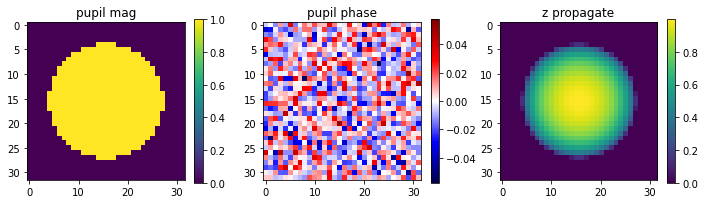

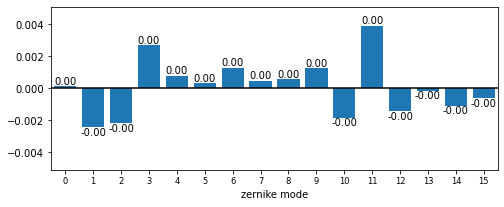

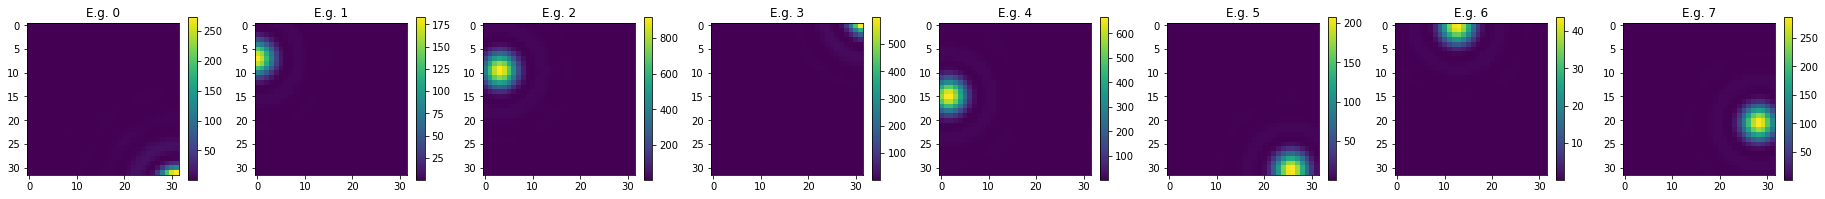

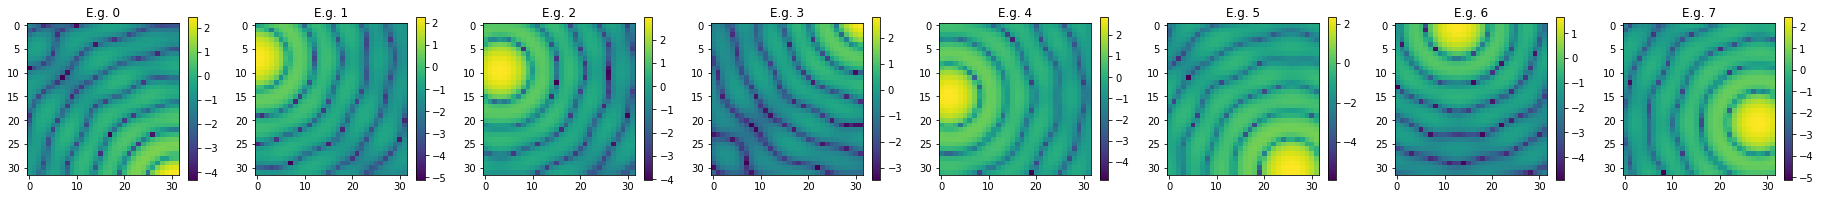

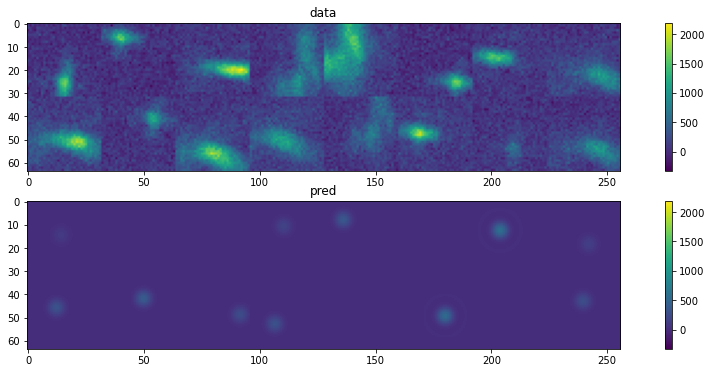

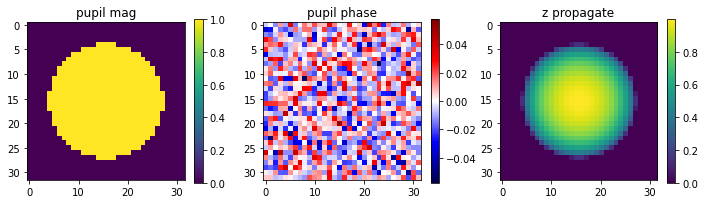

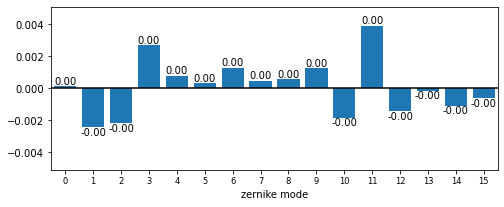

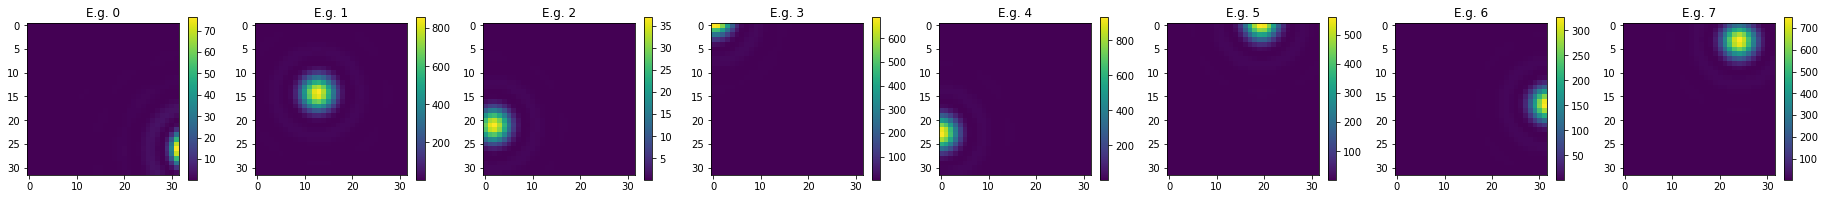

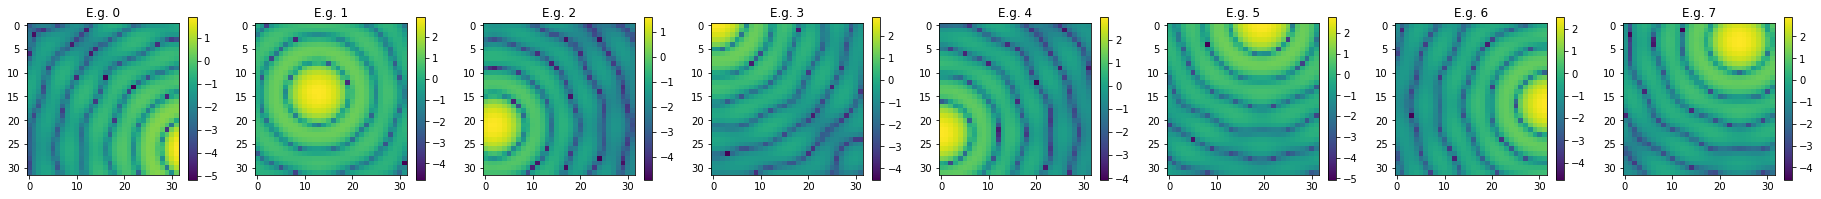

In [6]:
reload(trainer)
fitting_model = model.FourierOptics2DModel(fit_params=['x','y','A', ])
training = trainer.FittingTrainer(fitting_model, train_dataloader, valid_dataloader,)
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )

filepath = training.current_state["log_path"]
print(filepath)
training = trainer.FittingTrainer.from_model_file(os.path.join(filepath, "model.ptm"))
training.load_checkpoint(os.path.join(filepath, "checkpoint.ptc"))
training.train_data_loader = train_dataloader
training.valid_data_loader = valid_dataloader
training.train_and_validate(2, tb_logger=None)
model.check_model(fitting_model, )